In [1]:
import os
from PIL import Image,ImageOps
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
my_image='cat.jpg'
image_path = os.path.join(cwd, my_image)
image_path

 cat.jpg


'/home/sumant/jupyter notebooks/cat.jpg'

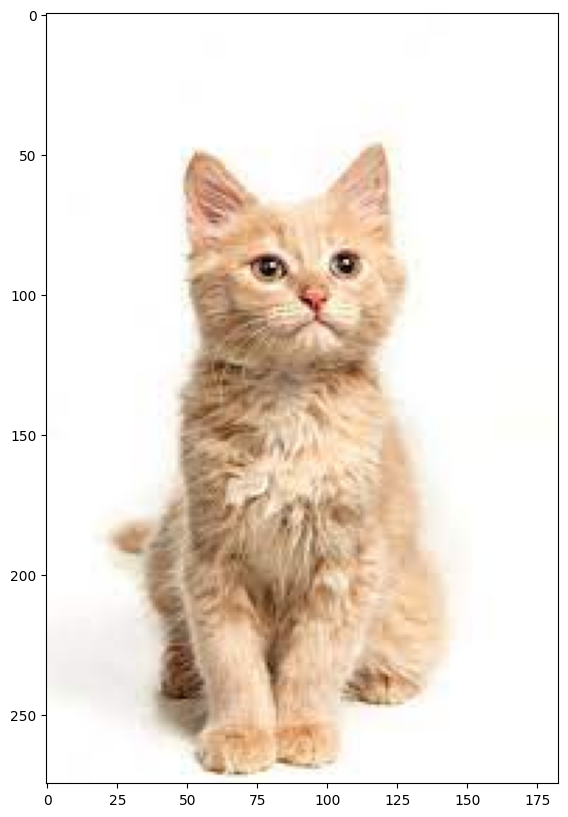

In [3]:
image = Image.open(my_image)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

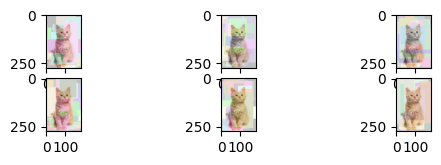

In [31]:
#     pip install pillow

import numpy as np
from PIL import Image, ImageDraw

def generate_synthetic_image(original_image_path, output_image_path):
    # Load the original image
    original_image = Image.open(original_image_path)

    # Create a copy of the original image
    synthetic_image = original_image.copy()

    # Get image size
    width, height = synthetic_image.size

    # Create a pattern with random colors
    pattern_image = create_random_pattern(width, height)

    # Set blending ratio (0.0 to 1.0)
    alpha = 0.25

    # Blend the original image and the pattern image
    synthetic_image = Image.blend(synthetic_image, pattern_image, alpha)

    # Save the synthetic image
    return synthetic_image

def create_random_pattern(width, height):
    # Create a blank image
    pattern_image = Image.new("RGB", (width, height))

    # Create a draw object to draw on the image
    draw = ImageDraw.Draw(pattern_image)

    # Draw random rectangles with random colors
    for _ in range(50):
        color = (np.random.randint(256), np.random.randint(256), np.random.randint(256))
        x0, y0 = np.random.randint(width), np.random.randint(height)
        x1, y1 = np.random.randint(width), np.random.randint(height)
        draw.rectangle([x0, y0, x1, y1], fill=color)

    return pattern_image



if __name__ == "__main__":
    # Replace 'path/to/original/image.jpg' with the path to your original image
    original_image_path = "cat.jpg"

    # Replace 'path/to/output/image.jpg' with the desired output path for the synthetic image
    output_image_path = "synthetic.jpg"
    for i in range(1,7):
        sp = plt.subplot(6,3,i)
        img=generate_synthetic_image(original_image_path, output_image_path)
        img=np.array(img)

        plt.imshow(img)

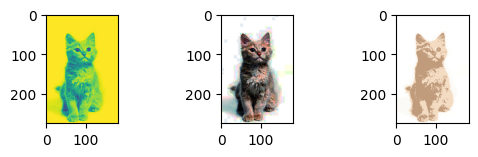

In [4]:
image = Image.open(my_image)
sp=plt.subplot(3,3,1)
plt.imshow(ImageOps.grayscale(image))
sp=plt.subplot(3,3,2)
plt.imshow(ImageOps.equalize(image))
sp=plt.subplot(3,3,3)
plt.imshow(image.quantize(6))

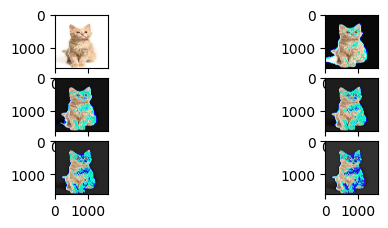

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
show_file='cat.jpg'
j=1
change_fac=0
for i in range(1,7):
    sp = plt.subplot(6,2,i)
    img = Image.open(show_file)
    img=img.resize((1600,1600))
    img=np.array(img)+change_fac
    plt.imshow(img)
    change_fac+=10

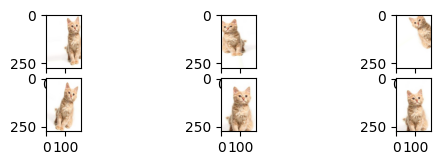

In [18]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img = load_img('cat.jpg') 
x = img_to_array(img) 
y=x.shape
x = x.reshape((1,) + x.shape) 
i = 0
for z in datagen.flow(x, batch_size=1):
    i += 1
    sp = plt.subplot(6,3,i)
    plt.imshow(z.reshape(y))
    if i == 6 :
        break